# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from numpy.random import seed
medical = pd.read_csv('data/insurance2.csv')

In [3]:
medical.shape

(1338, 8)

In [4]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A: Comparing the graph to the mean and standard deviation, these summary statistics do not appear to misleading.
The mean charge of 12,000 dollars seems high to me, but on examination of the range of values of medical charges, the minimum charge was over 1,000 dollars. Perhaps this dataset is only looking at charges for a certain type of medical operation or annual premium. (I also looked at the source on the Kaggle website but there was no further explanation for what these charges were for)__

Mean charges: 13270.422265141257
Standard Deviation (with Bessel Correction): 12110.011236693994


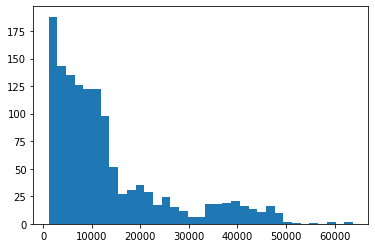

In [13]:
mean_charges = np.mean(medical.charges)
std_charges = np.std(medical.charges, ddof=1)
print('Mean charges:', mean_charges)
print('Standard Deviation (with Bessel Correction):', std_charges)

plt.hist(medical.charges, bins= 35)
plt.show()

In [14]:
medical.describe()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265,0.585202
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237,0.492871
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900,0.000000
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150,0.000000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000,1.000000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515,1.000000
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010,1.000000


__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

In [18]:
samp_mean_charges = medical.charges.mean()
samp_mean_charges

13270.422265141257

First of all the mean of this sample is over 13,000 dollars, which on face value would  suggest that the average for the whole population (the total charges at the hospital) would also at least be above 12,000 dollars. 

To be more accurate we can make a 95% Confidence Interval about what the average value of the population.
(However, my understanding was that according to the Central Limit Theorem our Confidence Intervals are only justified if they
are normally distributed and the distribution of charges is very right skewed, perhaps a different statistical method is merited)

In [27]:
# Standard Error of the Mean (with Bessel's Correction)

sem_charges = medical.charges.std() / np.sqrt(len(medical.charges))
sem_charges

331.06745431568226

In [28]:
# Margin of Error for 95% Confidence Interval
error= 1.96 * sem_charges
error

648.8922104587372

In [33]:
# Confidence Interval

lower = samp_mean_charges - error
upper = samp_mean_charges + error
print('Lower bound of 95% Confidence Interval:',lower,)
print('Upper Bound of 95% Confidence Interval:',upper)

Lower bound of 95% Confidence Interval: 12621.53005468252
Upper Bound of 95% Confidence Interval: 13919.314475599993


__A: We can say that with 95% confidence that the true mean of the population lies between approx. 12,600-13,900 dollars. Thus the data suggests that hospital need not worry about currently not bringing in enough revenue, but the hospital should monitor for any future downward trends in revenue.__

__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

__A: (Confidence Interval in the cells above.) I believe for calculating the estimated mean of a population with a 95% Confidence Interval is by default a two-sided interval. If we were to calculate the p-value for the mean hospital revenue being below 12,000 dollars, then we would want to use a one-sided interval.__

In [35]:
# To Find the p-value for the hospital having an average charge of less than 12,000 dollars in revunue.
# First we will need to calculate the z-score.

z_score = (12000 - samp_mean_charges) / sem_charges
z_score

-3.837351719658534

In [63]:
import scipy.stats 

p_value = scipy.stats.norm.sf(abs(z_score)) 
print('P-value:', p_value)

P-value: 6.218414205406061e-05


__The p-value of having an average revenue of less than 12,000 dollars is 0.00006, which is a very low meaning that it is very unlikely that the true mean revenue of the hospital is less than 12,000 dollars.__

The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

__A:__

__Null Hypothesis: People without insurance ARE charged the same amount as those without insurance.__

__Alternative Hypothesis: People without insurance ARE NOT charged the same amount as those without insurance.__

In [78]:
medical.shape

(1338, 8)

In [73]:
has_insurance = medical[medical['insuranceclaim'] == 1]
no_insurance = medical[medical['insuranceclaim'] != 1]

mean_no_ins = no_insurance.charges.mean()
mean_has_ins = has_insurance.charges.mean()

In [74]:
print(mean_no_ins, mean_has_ins)

8821.421892306294 16423.928276537663


__To determine if there a significant statistical difference between these two groups, we will calculate the the T-Test value.__



In [85]:
var_no_ins = np.var(no_insurance.charges) 
var_has_ins = np.var(has_insurance.charges)
n_no_ins = len(no_insurance.charges)
n_has_ins = len(has_insurance.charges)

# T-Test value (signal / noise)
signal = np.abs(mean_has_ins - mean_no_ins)
noise = np.sqrt((var_no_ins / n_no_ins) *(var_has_ins / n_has_ins))
t_val = signal / noise
print('Incorrect t-val (will use scipy.stats function instead in next cell):', t_val)

Incorrect t-val (will use scipy.stats function instead in next cell): 0.055434247912680264


In [88]:
print("Correct T-value:", scipy.stats.ttest_ind(no_insurance.charges,has_insurance.charges))

Correct T-value: Ttest_indResult(statistic=-11.893299030876712, pvalue=4.461230231620717e-31)


__With a standard alpha value of 0.05, and 1336 degrees of freedom, will find statistical significance if we have a t-val greater than 1.96 or a p-value of less than 0.05. Our Test Statistic(11.89) is MUCH greater than our significance level of 1.96, thus:__

__We will REJECT the Null Hypothesis that there is no difference between charges between those with and without insurance.__



__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A: (I already found the test statistic manually and with the scipy.stats functions above) I was getting an incorrect value when I calculated the statistic manually, but got the correct figure when I used the scipy stats function).__ 

Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A: There is a scipy.stats functions fore calculating the z-score (scipy.stats.mstats.zscore).__

__They are very similar tests that provide very similar results, but a key difference is that below 30 subjects requires a T-Test where as above 30 a Z-Test is okay. A Z-Test also needs to be normally distributed and the standard deviation of the population must be known. I believe that the T-Test is also used when comparing two populations.__

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test